# Sentiment Analysis on Social Media

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('twitter_training.csv')

In [2]:
print(df.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [3]:
print(df.tail())

       2401 Borderlands  Positive  \
74676  9200      Nvidia  Positive   
74677  9200      Nvidia  Positive   
74678  9200      Nvidia  Positive   
74679  9200      Nvidia  Positive   
74680  9200      Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
74676  Just realized that the Windows partition of my...     
74677  Just realized that my Mac window partition is ...     
74678  Just realized the windows partition of my Mac ...     
74679  Just realized between the windows partition of...     
74680  Just like the windows partition of my Mac is l...     


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [10]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [11]:

# Define the correct column names
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']

# Handle missing values
df.dropna(subset=['Text', 'Sentiment'], inplace=True)


In [12]:
# Clean text function
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Clean the text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])
    return text

# Apply cleaning function to the 'Text' column
df['cleaned_text'] = df['Text'].apply(clean_text)

# Display the cleaned data
print(df[['ID', 'Topic', 'Sentiment', 'cleaned_text']].head())

     ID        Topic Sentiment                  cleaned_text
0  2401  Borderlands  Positive            coming border kill
1  2401  Borderlands  Positive    im getting borderland kill
2  2401  Borderlands  Positive   im coming borderland murder
3  2401  Borderlands  Positive  im getting borderland murder
4  2401  Borderlands  Positive  im getting borderland murder


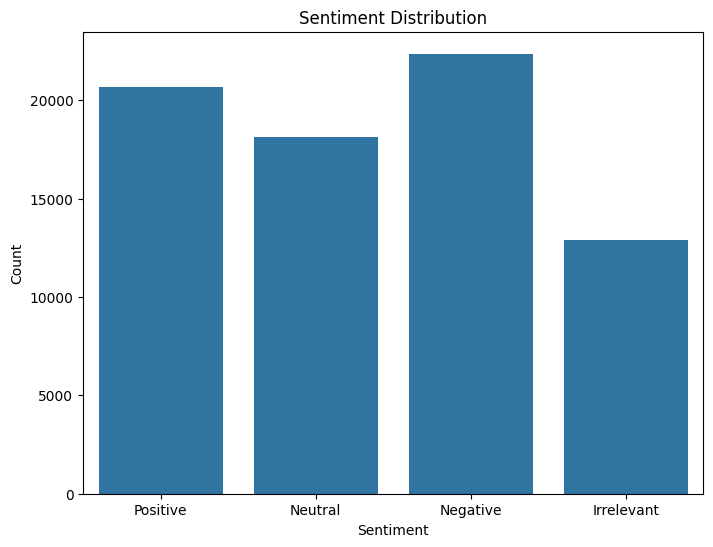

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


###### The sentiment distribution graph reveals a somewhat surprising pattern in the dataset, with negative sentiment having the highest count at approximately 22,000 mentions, followed closely by positive sentiment at around 20,000. Neutral sentiment falls in the middle range with roughly 18,000 counts, while irrelevant content shows the lowest frequency at about 13,000 mentions. This distribution suggests that users tend to express stronger emotional opinions (both positive and negative) more frequently than neutral or irrelevant content when discussing gaming-related topics.

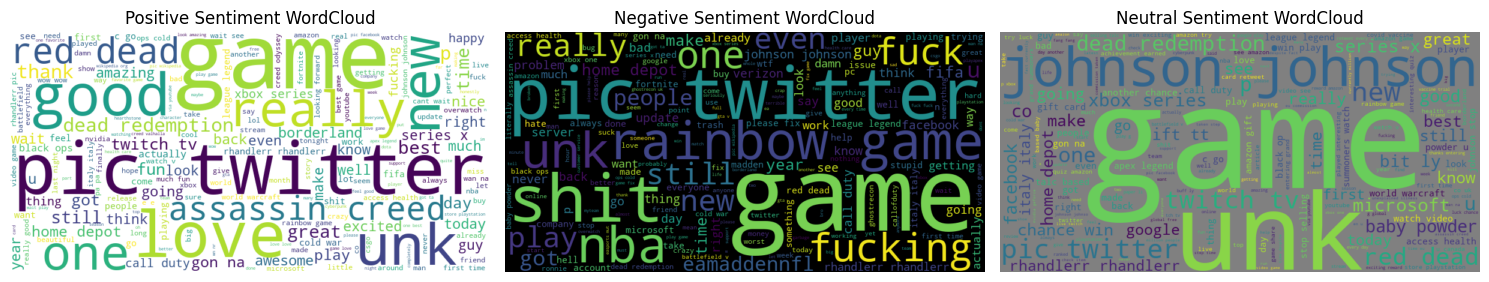

In [15]:
from wordcloud import WordCloud

# Separate positive, negative, and neutral sentiments
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['cleaned_text'])
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['cleaned_text'])
neutral_text = ' '.join(df[df['Sentiment'] == 'Neutral']['cleaned_text'])

# Generate WordCloud for Positive Sentiment
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate WordCloud for Negative Sentiment
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Generate WordCloud for Neutral Sentiment
wordcloud_neu = WordCloud(width=800, height=400, background_color='grey').generate(neutral_text)

# Display the WordClouds
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment WordCloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment WordCloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title('Neutral Sentiment WordCloud')
plt.axis('off')

plt.tight_layout()
plt.show()


###### The three word clouds reveal distinct emotional patterns in gaming discussions across social media. While "game" remains a central term throughout all sentiments, its context shifts dramatically - from being surrounded by terms of enjoyment and appreciation in the positive cloud, to expressions of frustration in the negative cloud, and finally appearing alongside more neutral industry terms and descriptive language in the neutral cloud. This visualization effectively demonstrates how the same core topic can evoke vastly different emotional responses within gaming communities.

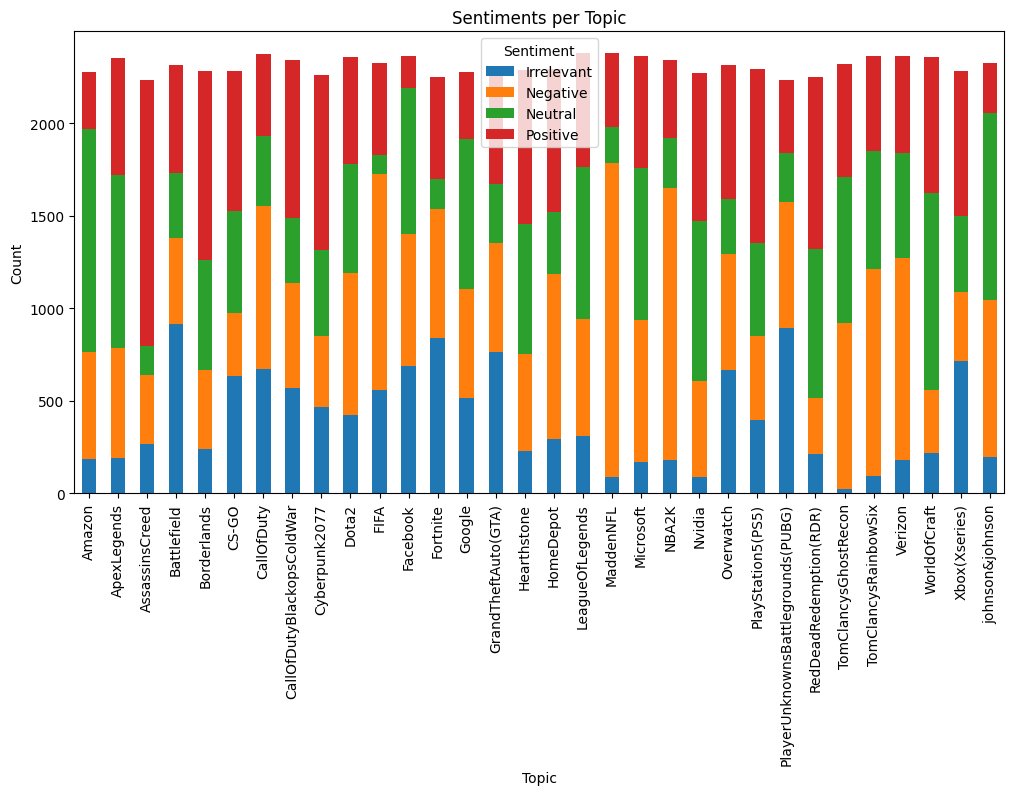

In [19]:
# EDA: Topics and their sentiments
topic_sentiments = df.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)
topic_sentiments.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiments per Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

###### The sentiment analysis across gaming and technology companies reveals a diverse emotional landscape. Most entities maintain a balanced distribution of positive, neutral, and negative sentiments, with positive and neutral reactions generally dominating the conversation. Companies like BattleField, FIFA, and PlayStation show higher proportions of irrelevant content, while Xbox/Series and Nintendo enjoy notably positive sentiment among users. The total volume of mentions stays relatively consistent across platforms, typically ranging between 1500-2500 counts, suggesting an even distribution of audience engagement across the industry.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare the features and target
X = df['cleaned_text']  # cleaned text
y = df['Sentiment']     # sentiment labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Predict sentiments on test data
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6982904250287182
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.70      0.53      0.60      2624
    Negative       0.74      0.78      0.75      4463
     Neutral       0.71      0.64      0.67      3589
    Positive       0.65      0.77      0.71      4123

    accuracy                           0.70     14799
   macro avg       0.70      0.68      0.69     14799
weighted avg       0.70      0.70      0.70     14799



###### The sentiment analysis model demonstrates moderate performance with an overall accuracy of 69%. The classifier performs best at detecting negative sentiments, achieving a precision of 0.74 and recall of 0.78, while showing relative weakness in identifying positive sentiments (precision 0.65). The dataset appears well-distributed across sentiment categories, with negative samples being the most numerous at 4,463 instances and irrelevant content having the least at 2,624 samples. The consistent weighted average of 0.70 across metrics suggests the model maintains stable, though not exceptional, classification capabilities.